In [92]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree # tree plotting

In [93]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df=pd.read_csv('crop_recc.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [95]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.shape

(2200, 8)

# Exploratory Data Analysis

### Heatmap to check null/missing values

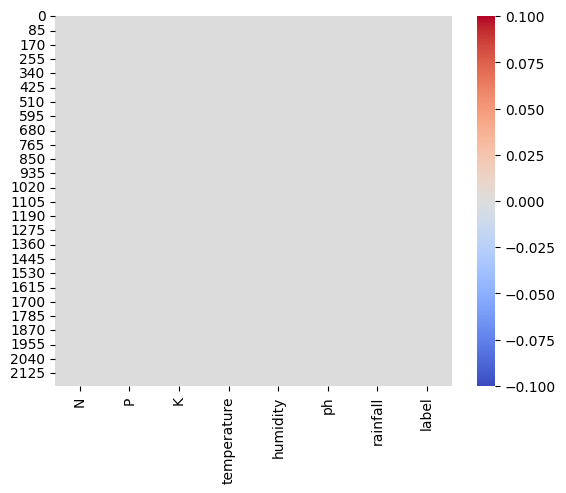

In [7]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<AxesSubplot:xlabel='humidity', ylabel='Density'>

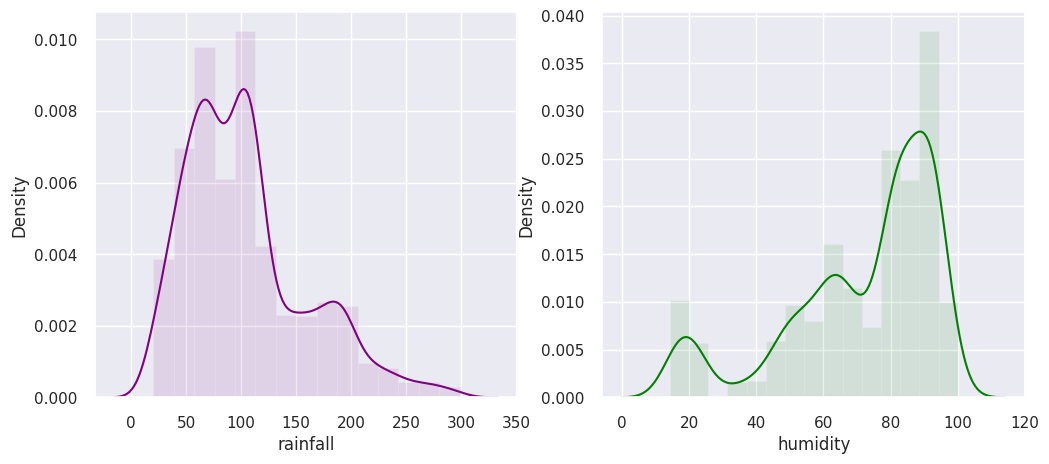

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['rainfall'],color="purple",bins=15,hist_kws={'alpha':0.1})
plt.subplot(1, 2, 2)
sns.distplot(df['humidity'],color="green",bins=15,hist_kws={'alpha':0.1})

<AxesSubplot:xlabel='temperature', ylabel='Density'>

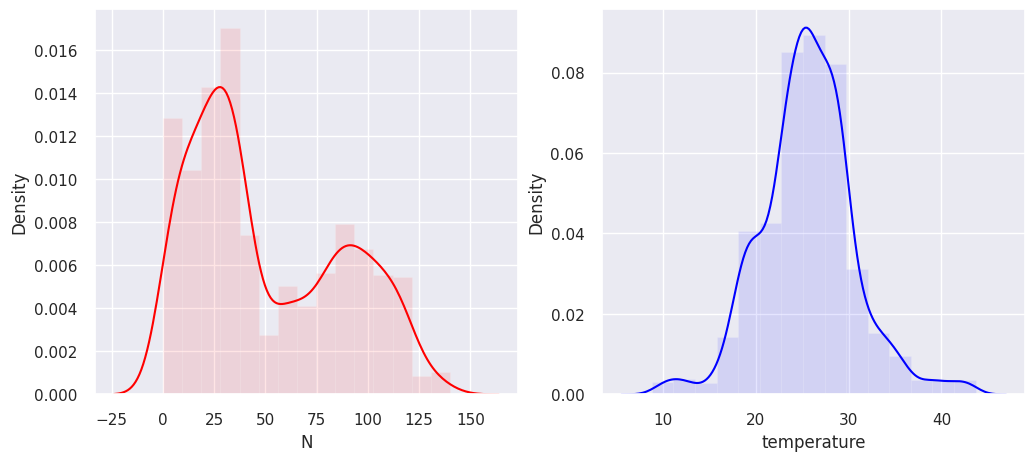

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df['N'],color="red",bins=15,hist_kws={'alpha':0.1})
plt.subplot(1, 2, 2)
sns.distplot(df['temperature'],color="blue",bins=15,hist_kws={'alpha':0.1})

<AxesSubplot:xlabel='ph', ylabel='Density'>

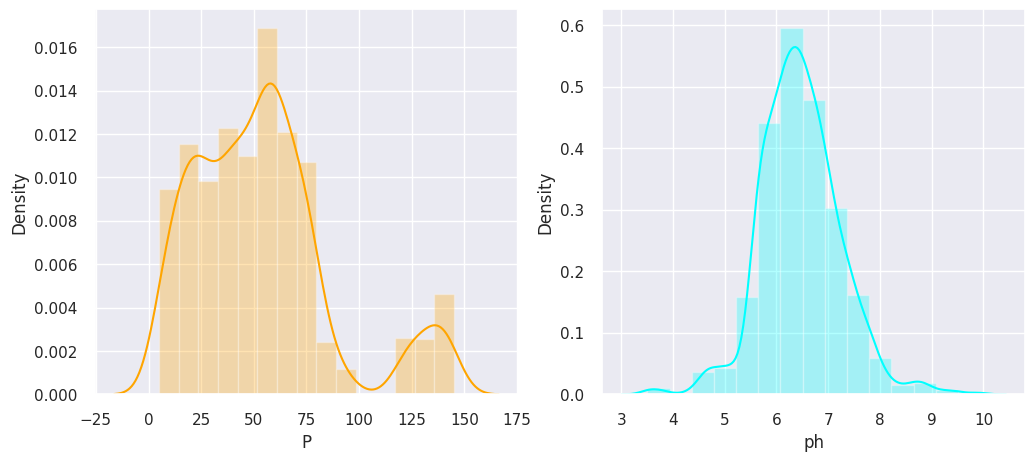

In [75]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['P'],color="orange",bins=15,hist_kws={'alpha':0.3})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="cyan",bins=15,hist_kws={'alpha':0.3})

<h3> We are Checking how much of each crop has came in entire datasets. </h3>

<AxesSubplot:ylabel='count'>

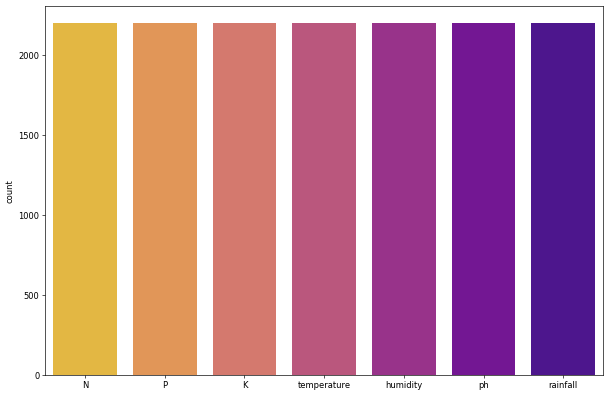

In [9]:
plt.figure(figsize = (12,8),dpi=60)
sns.countplot(data=df, palette="plasma_r")


<h4>Visualizing the data by each features . Here we are looking how data is distributed according to two features

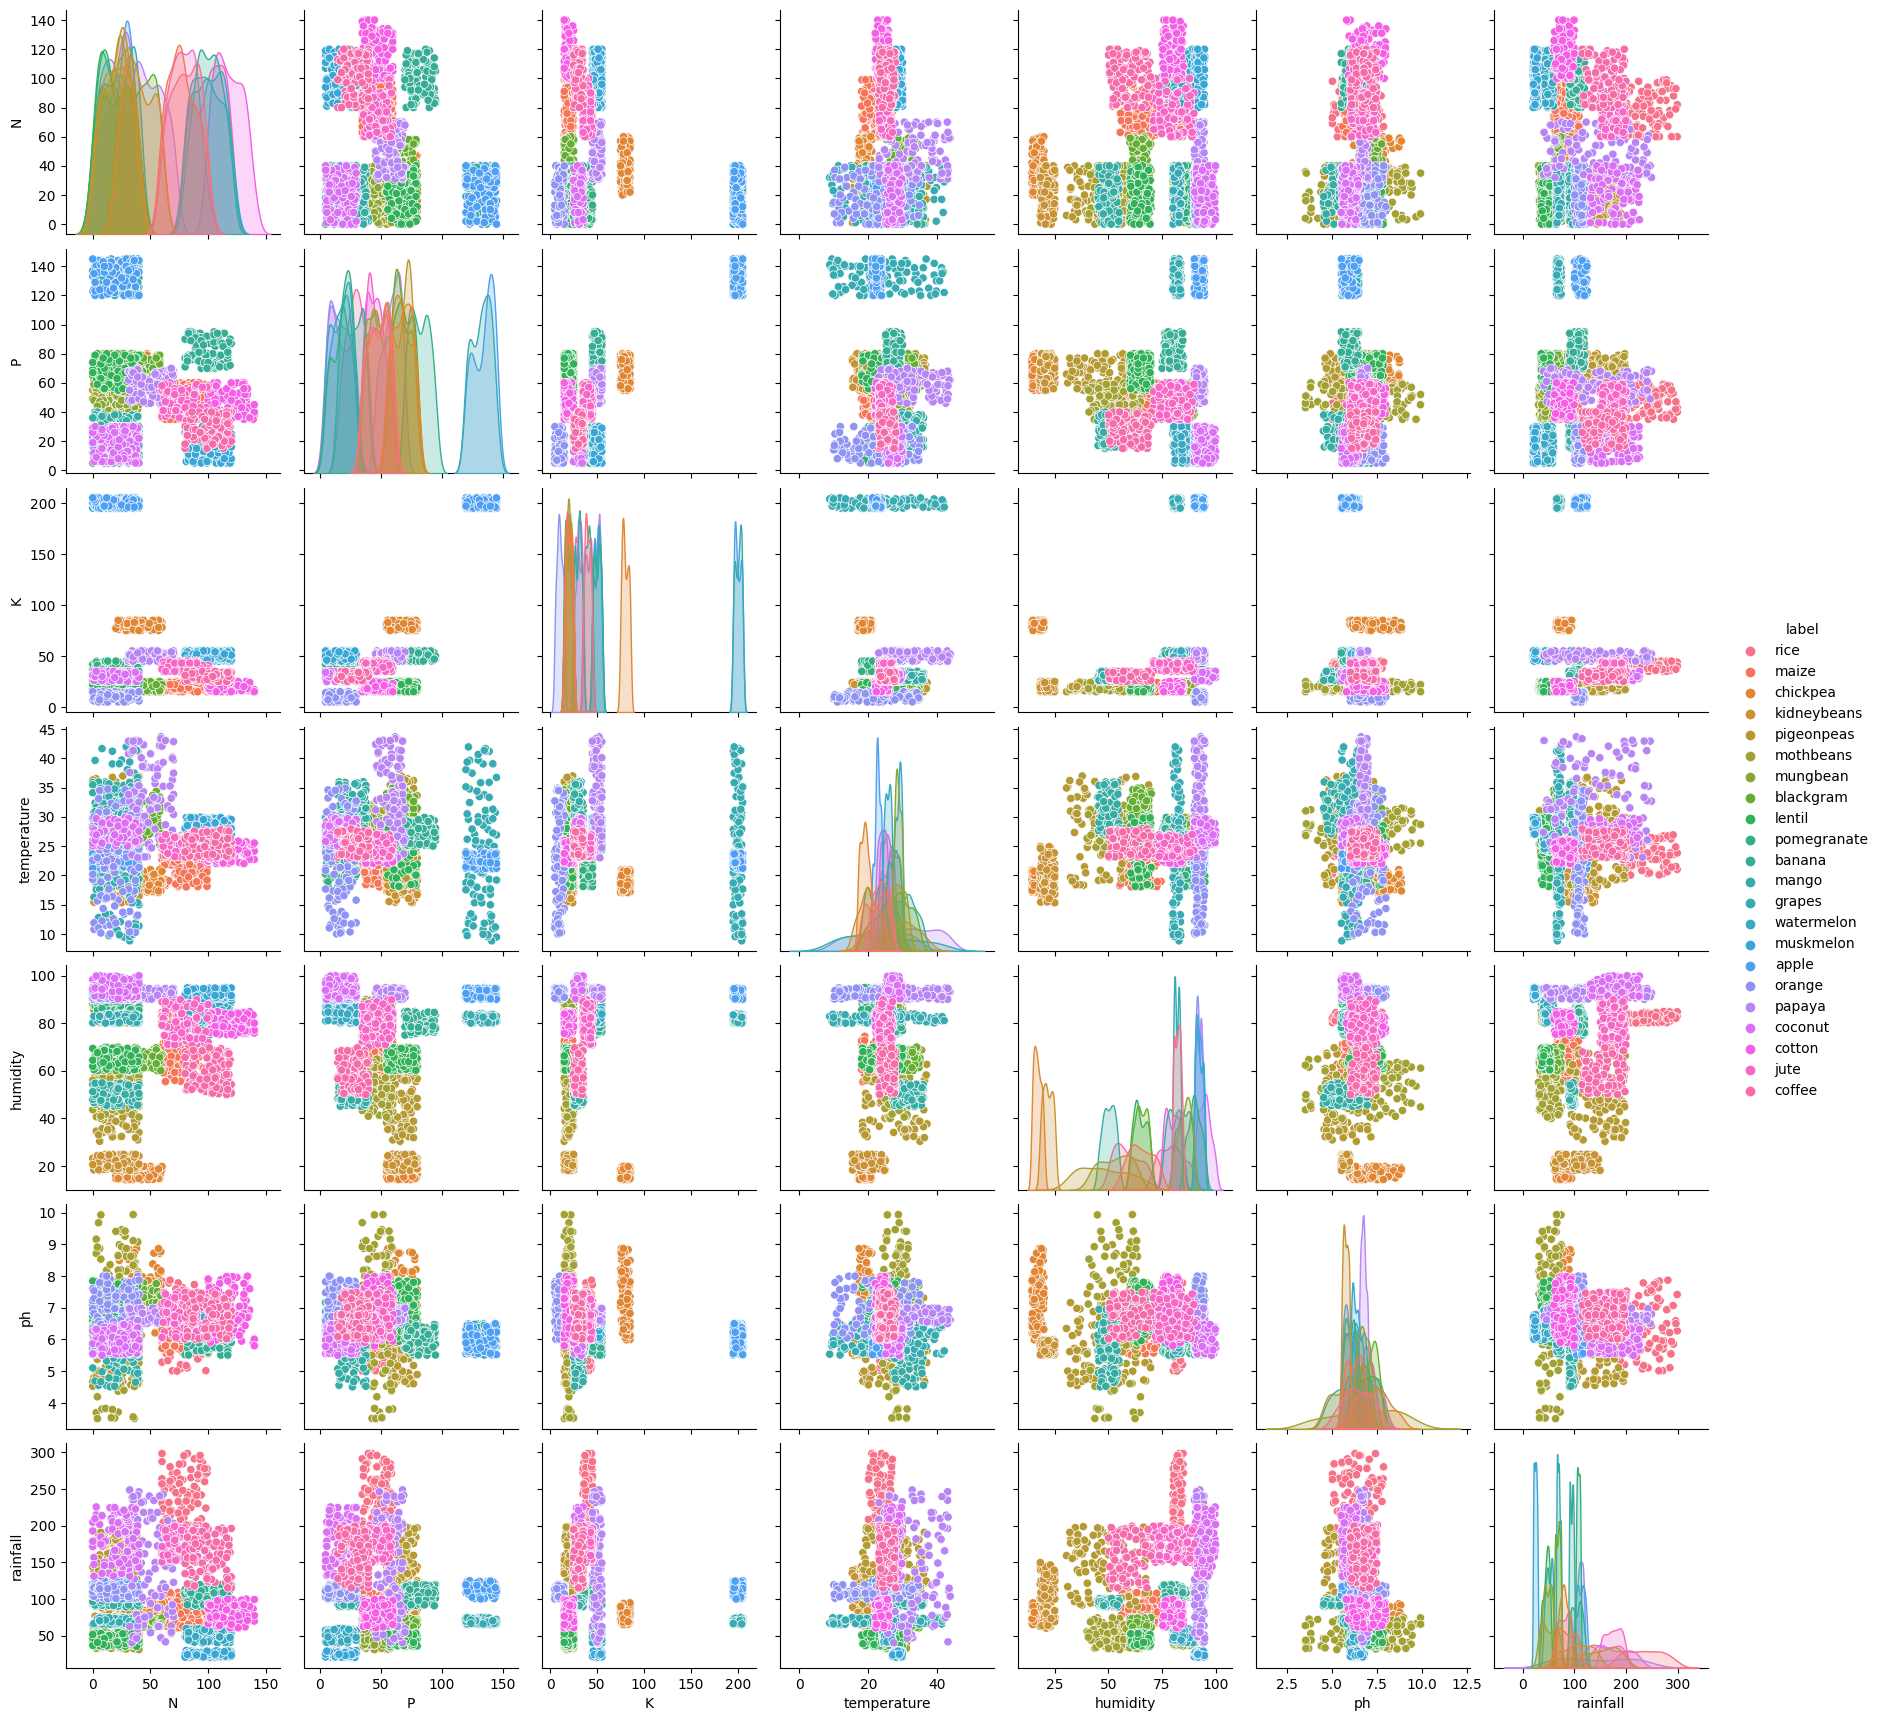

In [10]:
sns.pairplot(df, hue = 'label')

#### In rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain plays important role for crops like Rice. It   makes Ph to be suitable for many Crops Which We are Trying to see through plotting a graph 


- <b> Rice Needs more rainfall as well as humidity for its good production , that is why major rice's production is done in East Coasts which has avergage raninfall 200mm each annum. 
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

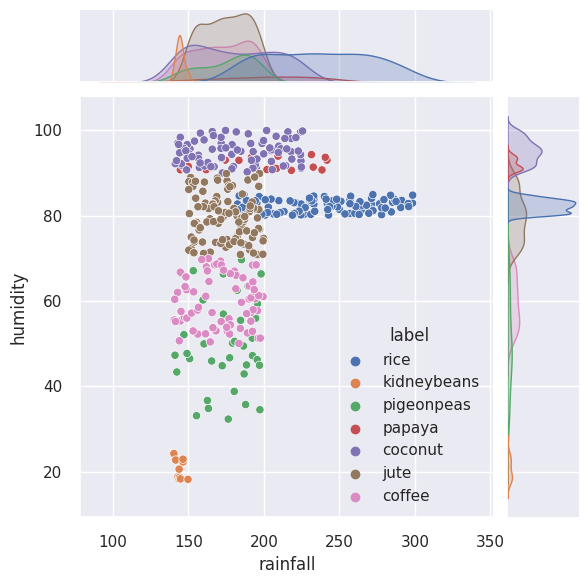

In [62]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>140)],hue="label")

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot:xlabel='ph', ylabel='label'>

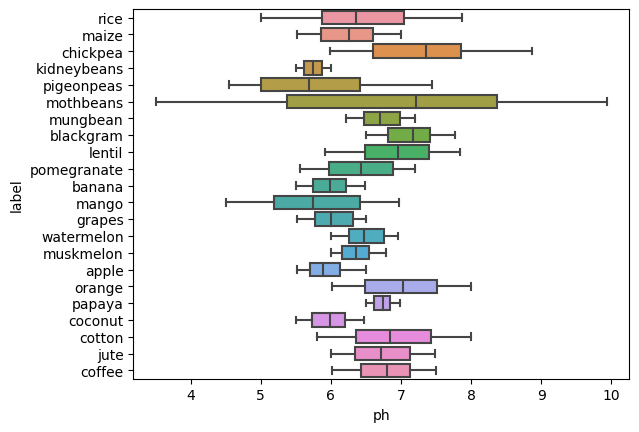

In [12]:
sns.boxplot(y='label',x='ph',data=df)

#### Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<AxesSubplot:xlabel='P', ylabel='label'>

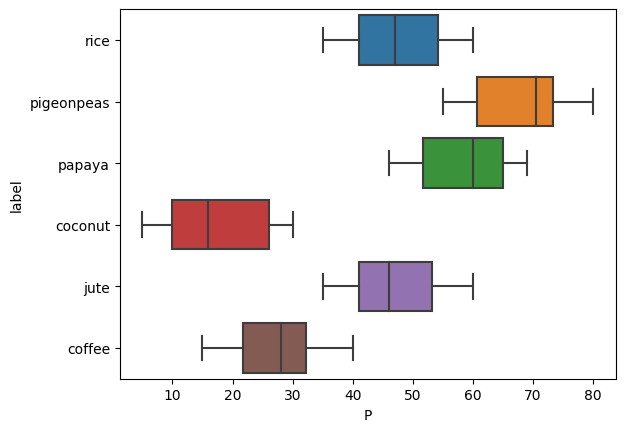

In [13]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<AxesSubplot:xlabel='K', ylabel='rainfall'>

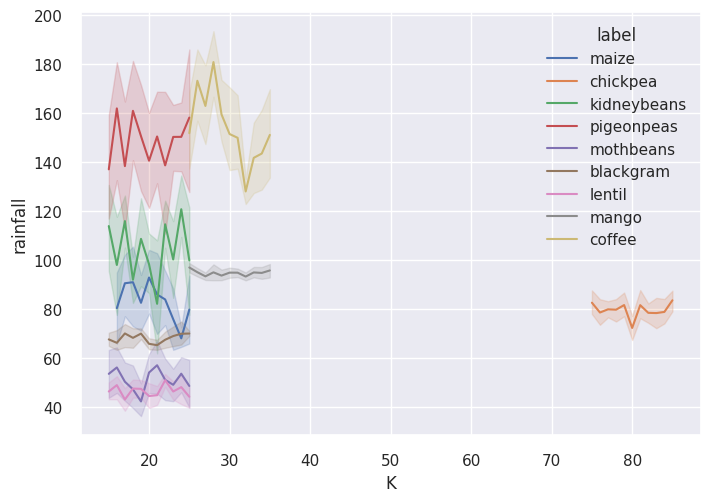

In [91]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [15]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<AxesSubplot:>

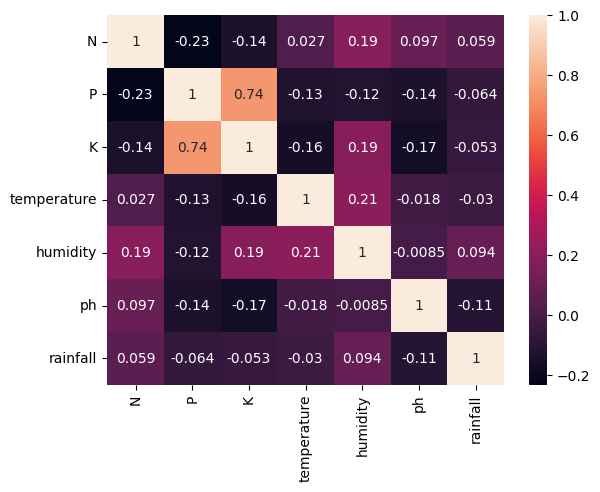

In [16]:
sns.heatmap(X.corr(),annot=True)

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## KNN Classifier for Crop prediction. 
<hr>

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_crop_pred = KNeighborsClassifier()
knn_crop_pred.fit(X_train_scaled, y_train)
print('KNN model score :',knn_crop_pred.score(X_test_scaled, y_test))


KNN model score : 0.9818181818181818


### Let's try different values of n_neighbors to fine tune and get better results

## Classification using Support Vector Classifer (SVC)
<hr>

In [21]:
from sklearn.svm import SVC
svc_linear_crop_pred = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear_crop_pred.score(X_test_scaled,y_test))

svc_rbf_crop_pred = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_rbf_crop_pred.score(X_test_scaled,y_test))

svc_poly_crop_pred = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly_crop_pred.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9727272727272728
Rbf Kernel Accuracy:  0.9863636363636363
Poly Kernel Accuracy:  0.9863636363636363


**POINTS TO BE HIGHLIGHTED**
1. *Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases*
2. *The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.*
3. *RBF has better result than linear kernel.*
4. *Poly kernel so far wins by a small margin.*

### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}

tuning_model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
tuning_model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [23]:
print(tuning_model.best_score_ )
print(tuning_model.best_params_ )

0.9868686868686869
{'C': 1.0, 'gamma': 0.001}


## Classifying using decision tree
<hr>

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_crop_pred = DecisionTreeClassifier(random_state=42,max_depth=10).fit(X_train, y_train)
print('Model accuracy score : ',format(DT_crop_pred.score(X_test,y_test)))


Model accuracy score :  0.9772727272727273


## Random Forest.
<hr>

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_crop_pred = RandomForestClassifier(max_depth=8,n_estimators=50,random_state=30).fit(X_train, y_train)
print('Random Forest Accuracy on training set: ',rf_crop_pred.score(X_train, y_train))
print('Random Forest Accuracy on test set: ',rf_crop_pred.score(X_test, y_test))

Random Forest Accuracy on training set:  0.9964646464646465
Random Forest Accuracy on test set:  0.9954545454545455


## Classification using Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
grad_crop_pred = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad_crop_pred.score(X_test,y_test)))

Gradient Boosting accuracy : 0.990909090909091


# XGBOOST

In [27]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score
xgb_crop = xgb.XGBClassifier().fit(X_train,y_train)
xgb_pred_crop = xgb_crop.predict(X_test)
print('XGBoost accuracy : {}'.format(accuracy_score(y_test, xgb_pred_crop)))

XGBoost accuracy : 0.990909090909091


<AxesSubplot:>

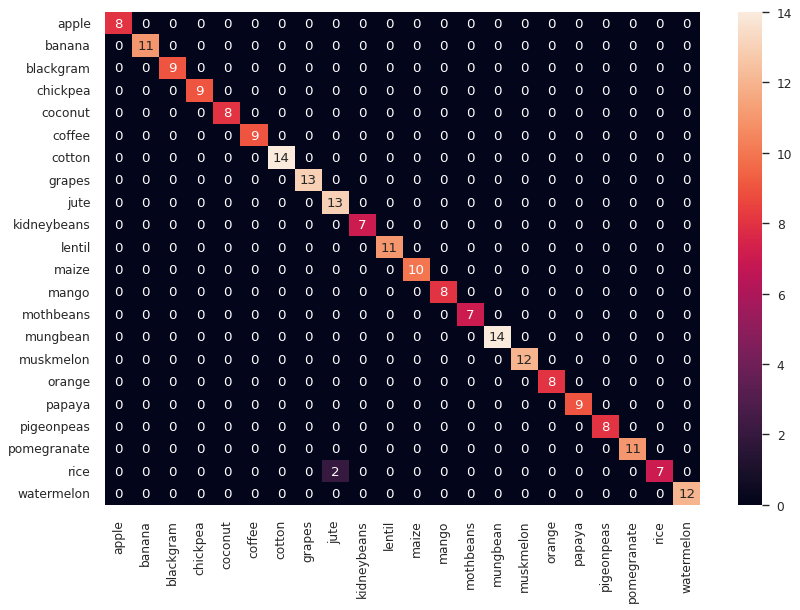

In [55]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (12,8),dpi=80)
xgb_mat_conf=confusion_matrix(y_test,xgb_crop.predict(X_test))
df_cm_crop = pd.DataFrame(xgb_mat_conf, list(targets.values()), list(targets.values()))
sns.heatmap(df_cm_crop, annot=True, annot_kws={"size": 12})

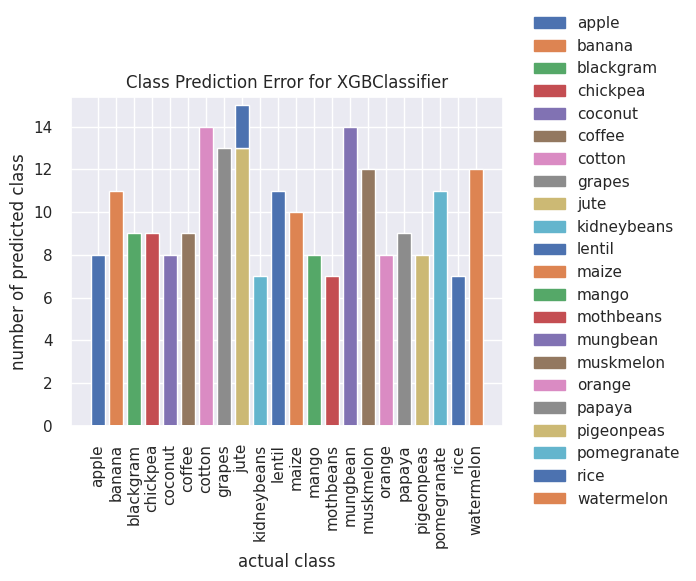

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [60]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
   xgb.XGBClassifier() , classes=list(targets.values())
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()
plt.gcf()

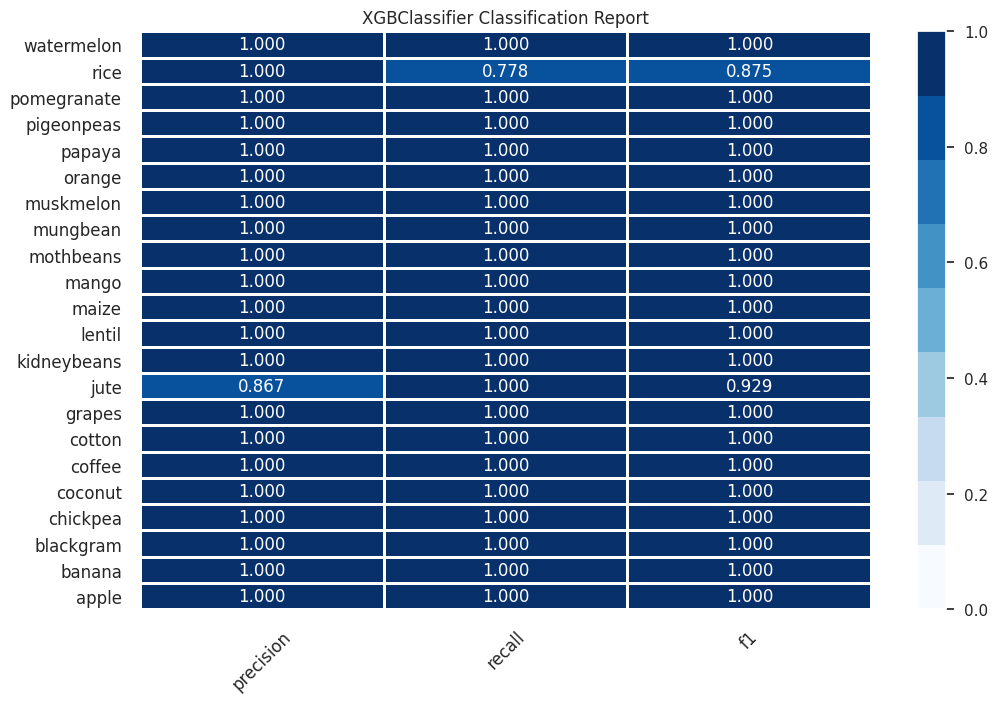

In [41]:
from yellowbrick.classifier import ClassificationReport
classes= list(targets.values())
xgb_report = ClassificationReport(xgb_crop, size=(1080, 720), classes=classes,cmap='Blues')
xgb_report.score(X_test, y_test)
c = xgb_report.poof()


<Figure size 800x320 with 0 Axes>

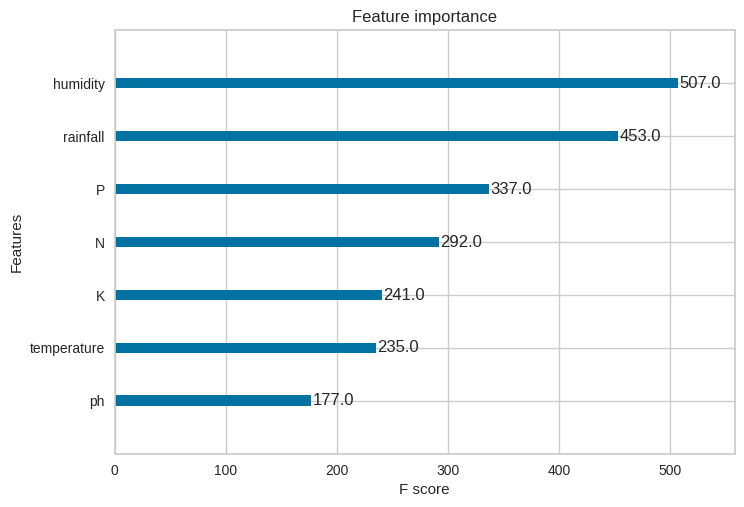

In [35]:
from xgboost import plot_importance,plot_tree
plt.figure(figsize=(10,4), dpi=80)
plot_importance(xgb_crop)
plt.show()

<AxesSubplot:>

<Figure size 2000x1500 with 0 Axes>

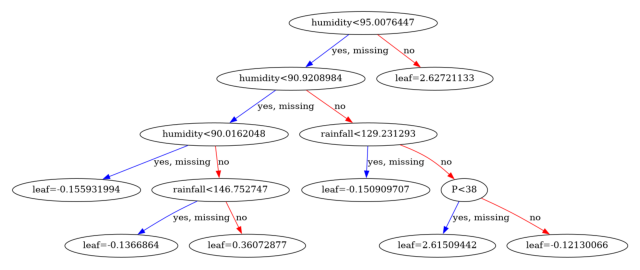

In [64]:
plt.figure(figsize=(20,15))
xgb.plot_tree(xgb.XGBClassifier().fit(X_train,y_train),num_trees=4)